In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
import random
import time

###

h = 0.05         #h : time-step size
n = int(200/h)    # number of time steps for Euler method =>  n = T/dt = 200/h
N = 500           #number of oscillators - 2000 fot this part!
r = 0            #order parameter

s = np.random.uniform(-0.5, 0.5, N)    # random uniform prob distribution between (-/+ 0.5)


t = np.random.uniform(0,2*math.pi,N)     #uniform dist of possible theta values
theta_j = t                              #every other choice of theta


sin_sum_dtheta0 = 0
cos_sum = 0
sin_sum = 0
R = []       

###

t = time.time()

K = np.arange(0.0, 1.53, 0.03)             #array of coupling constants

for q in range(len(K)):
        
    for l in range(n):  
        
        for osc_idx in range(N):
            
            sin_sum_dtheta_t = 0
            
            for m in range(N):           #interaction
                
                sin_sum_dtheta_t += math.sin(theta_j[m] - theta_j[osc_idx])
                
            theta_dot = s[osc_idx] + (K[q]/N)*(sin_sum_dtheta_t)
                
            theta_j[osc_idx] += theta_dot*h
            
    
    cos_sum = np.sum(np.cos(theta_j))
    sin_sum = np.sum(np.sin(theta_j))

    r = (1/N)*((cos_sum)**2 + (sin_sum)**2)**0.5
    R.append([r])
    
elapsed = time.time() - t
print("This took: ", elapsed, "seconds")


This took:  26668.606503009796 seconds


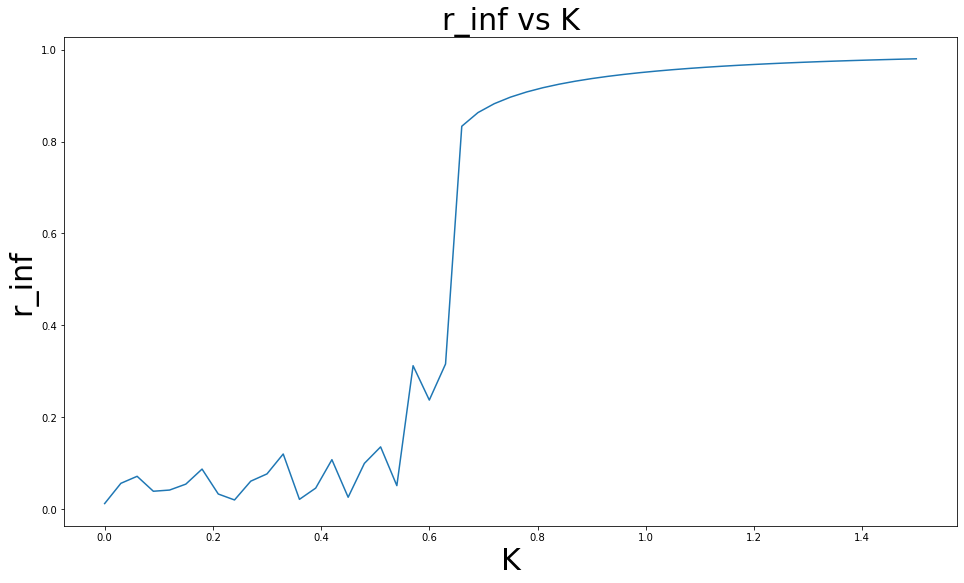

In [2]:
plt.figure(figsize=[16,9])
plt.plot(K, R)
plt.title("r_inf vs K",fontsize=30)
plt.xlabel('K',fontsize = 30)
plt.ylabel('r_inf',fontsize = 30)
plt.show()